# Deep Learning with TensorFlow

[Based on this CognitiveClass Course](https://cognitiveclass.ai/courses/deep-learning-tensorflow/)

## Labs

The Labs can be found in the `labs/deep-learning-with-tensorflow` directory and are released under MIT

## Introduction to TensorFlow

### What is TensorFlow

Open source library backed by C/C++ and uses a data flow graph base

Tensorflow provides a Python and C++ API as well as CPU/GPU/and Distributed Processing

### Data Flow Graphs

DFGs are made of **nodes** which are mathematical operations and **edges** which are tensors that flow between the operations, this allows us to visualize our graphs

Tensors are simply multi-dimensional arrays which can allow us to represent complex data structures

The different elements of the dataflow can be more easily seen in the Lab for the first section

## Hello World

TensorFlow carries out operations in the form of steps in a graph, an example procedure can be seen in the section 1 labs

### Lab - Hello World

First, we need to import TensorFlow

In [23]:
import tensorflow as tf

#### Build a Graph

Since TF uses a graph computation model, we need to create a graph object to work with

In [24]:
graph1 = tf.Graph()

#### Set Some Values

Once we have a graph we can define some tensor objects and add them to the `graph1` object

We can add 2 constants to the graph by calling `tf.constant()`, this will add a single `tf.Operation` to the graph and returns a `tf.Tensor` object

In [25]:
with graph1.as_default():
    a = tf.constant([2], name='constant_a')
    b = tf.constant([3], name='constant_b')

In [26]:
print('a = ', a, '\nb = ', b)

a =  Tensor("constant_a:0", shape=(1,), dtype=int32) 
b =  Tensor("constant_b:0", shape=(1,), dtype=int32)


We can see that the tensor only shows its name and type and not it's actual value. The value is evaluated when we run a TF session

In [27]:
sess = tf.Session(graph=graph1)
result = sess.run(a)
print(result)
sess.close()

[2]


#### Define an Operation

Next we can add the two tensors in one of two ways, either using the `+` operator as `c = a + b` or with `tf.add()`

In [28]:
with graph1.as_default():
    c =  tf.add(a, b)

In [29]:
sess = tf.Session(graph=graph1)
result = sess.run(c)
print(result)
sess.close()

[5]


#### Manage Session

We can avoid having to close the session by using a `with` block

In [30]:
with tf.Session(graph=graph1) as sess:
    result = sess.run(c)
    print(result)

[5]


#### What's a Tensor?

Tensors are simply mathematical arrays, these can be seen to be as follows

| Dimension | Physical Representation | Mathematical Object | Code | 
| --- | --- | --- | --- | 
| Zero | Point | Scalar | \[1\] |
| One | Line | Vector | \[1,2,3,4\] |
| Two | Surface | Matrix | \[\[1,2,3,4\],\[1,2,3,4\]\] |
| Three | Volume | Tensor | \[\[\[1,2\],\[1,2\]\]\, \[\[1,2\],\[1,2\]\]] |

#### Make some Tensors

We can define these using TF as follows

In [31]:
graph2 = tf.Graph()

with graph2.as_default():
    scalar = tf.constant(1)
    vector = tf.constant([1,2,3])
    matrix = tf.constant([[1,2,3],[1,2,3]])
    tensor = tf.constant([[[1,2,3],[1,2,3]], [[1,2,3],[1,2,3]]])

with tf.Session(graph=graph2) as sess:
    print('Scalar: \n', sess.run(scalar))
    print('\nVector: \n', sess.run(vector))    
    print('\nMatrix: \n', sess.run(matrix))    
    print('\nTensor: \n', sess.run(tensor))

Scalar: 
 1

Vector: 
 [1 2 3]

Matrix: 
 [[1 2 3]
 [1 2 3]]

Tensor: 
 [[[1 2 3]
  [1 2 3]]

 [[1 2 3]
  [1 2 3]]]


In [32]:
print(scalar.shape, vector.shape, matrix.shape, tensor.shape)

() (3,) (2, 3) (2, 2, 3)


#### Variables

Variables are used to share and persist stats that the program manipulates, when we define a variable TF adds a `tf.Operation` to our graph, this can store a writable variable that persists between sessions

We can define a variable with `tf.Variable()` and then running `tf.global_variables.initializer()`

In [33]:
v = tf.Variable(0)

We can change the variable's value with `tf.assign()`

In [34]:
update = tf.assign(v, v+1)

In [35]:
init_op = tf.global_variables_initializer()

In [38]:
with tf.Session()  as sess:
    sess.run(init_op)
    print(sess.run(v))
    for _ in range(3):
        sess.run(update)
        print(sess.run(v))

0
1
2
3


#### Placeholders

Placeholders can be seen as holes in the model into which we will pass data in from outside the graph. These can be defined with `tf.placeholder()`

|Data type	|Python type|Description|
| --------- | --------- | --------- |
|DT_FLOAT	|tf.float32	|32 bits floating point.|
|DT_DOUBLE	|tf.float64	|64 bits floating point.|
|DT_INT8	|tf.int8	|8 bits signed integer.|
|DT_INT16	|tf.int16	|16 bits signed integer.|
|DT_INT32	|tf.int32	|32 bits signed integer.|
|DT_INT64	|tf.int64	|64 bits signed integer.|
|DT_UINT8	|tf.uint8	|8 bits unsigned integer.|
|DT_STRING	|tf.string	|Variable length byte arrays. Each element of a Tensor is a byte array.|
|DT_BOOL	|tf.bool	|Boolean.|
|DT_COMPLEX64	|tf.complex64	|Complex number made of two 32 bits floating points: real and imaginary parts.|
|DT_COMPLEX128	|tf.complex128	|Complex number made of two 64 bits floating points: real and imaginary parts.|
|DT_QINT8	|tf.qint8	|8 bits signed integer used in quantized Ops.|
|DT_QINT32	|tf.qint32	|32 bits signed integer used in quantized Ops.|
|DT_QUINT8	|tf.quint8	|8 bits unsigned integer used in quantized Ops.|

We can define a simple placeholder and operation as follows

In [41]:
a = tf.placeholder(tf.float32)
b = a * 2

#### Pass in the Value

We can pass the actual value for the variable with the `feed_dict` parameter of `sess.run()`

In [42]:
with tf.Session() as sess:
    result = sess.run(b, feed_dict={a:3.5})
    print(result)

7.0


In [43]:
dictionary = {a: [[[1,2,3],[4,5,6],[7,8,9],[10,11,12]] , 
                  [[13,14,15],[16,17,18],[19,20,21],[22,23,24]]]}

with tf.Session() as sess:
    result = sess.run(b,feed_dict=dictionary)
    print (result)

[[[  2.   4.   6.]
  [  8.  10.  12.]
  [ 14.  16.  18.]
  [ 20.  22.  24.]]

 [[ 26.  28.  30.]
  [ 32.  34.  36.]
  [ 38.  40.  42.]
  [ 44.  46.  48.]]]


 #### Operations
 
 Operations are nodes in the graph that represent mathematical operations over tensors, these can be any kind of functions such as `tf.constant()`, `tf.matmul()`, `tf.add()`, `tf.nn.sigmoid`, [among others](https://www.tensorflow.org/api_docs/python)

In [44]:
graph5 = tf.Graph()

with graph5.as_default():
    a = tf.constant([5])
    b = tf.constant([2])
    c = tf.subtract(a, b)
    
with tf.Session(graph=graph5) as sess:
    print(sess.run(c))

[3]


### Lab - Linear Regression

A simple linear model will be approcimated using the TF library

A linear model can be represented by the following equation:

$$
y=ax+b
$$

#### Import Libraries

Before we can start, we need to import some libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

#### Get the Data

The dataset will be the [**Fuel Consumption**](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64) dataset which consists of the following fields

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2019-02-06 08:12:10--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

100%[======================================>] 72,629      --.-K/s   in 0.1s    

2019-02-06 08:12:10 (476 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [3]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Target and Predictor Training Data

Next we can define our $x$ and $y$ variables for training based on the dataframe columns for *Engine Size* and *CO2 Emissions* respectively

In [4]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

#### Initialize and Define the Operations

We can initialize `a` and `b` with any random value and then define the relationship

In [5]:
a = tf.Variable(20.0)
b = tf.Variable(30.0)
y = a * train_x + b

#### Define the Losss

Next we need to define a loss function which is essentially the error function. Our model will then work to minimize this. We will use the **MSE** to define the loss (aka error)

In [7]:
loss = tf.reduce_mean(tf.square(y - train_y))

#### Optimization

Now we need to define an optimization function, in this case *Gradient Descent* which takes in a learning rate as a parameter. A high learning rate will converge faster, however it can also lead to model instability. Using a slow learning rate can reduce convergence rate but will be more likely to converge, however this may only converge to a local min instead of the global one

In [31]:
optimizer = tf.train.GradientDescentOptimizer(0.05)

#### Training

To trian we need to define a training method, in this case minimizing the loss

In [32]:
train = optimizer.minimize(loss)

#### Initialize Variables and Run Session

Lastly, we can initialize the variables and run the training session as follows

In [33]:
init = tf.global_variables_initializer()

In [34]:
loss_values = []
train_data = []

with tf.Session() as sess:
    sess.run(init)
    for step in range(100):
        _, loss_val, a_val, b_val = sess.run([train, loss, a, b])
        loss_values.append(loss_val)
        if step % 5 == 0:
            print(step, loss_val, a_val, b_val)
            train_data.append([a_val, b_val])

0 27056.3 77.138 45.9303
5 1895.91 58.8885 47.4235
10 1766.35 57.6921 52.8596
15 1656.73 56.4048 57.8747
20 1561.76 55.2084 62.5432
25 1479.49 54.0949 66.8884
30 1408.22 53.0585 70.9328
35 1346.47 52.0938 74.6972
40 1292.98 51.1959 78.2009
45 1246.64 50.3602 81.4621
50 1206.5 49.5824 84.4975
55 1171.71 48.8584 87.3227
60 1141.58 48.1845 89.9523
65 1115.48 47.5573 92.3999
70 1092.87 46.9735 94.678
75 1073.28 46.4301 96.7984
80 1056.31 45.9244 98.772
85 1041.6 45.4536 100.609
90 1028.86 45.0155 102.319
95 1017.83 44.6077 103.91


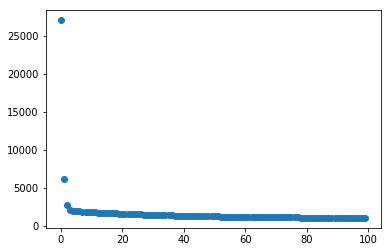

In [35]:
plt.plot(loss_values, 'o')

#### Plot Convergence

We can visualize the convergernce of the regression line with the following code (that I just copied and do not feel the need to try to interpret because it does weird colour magic)

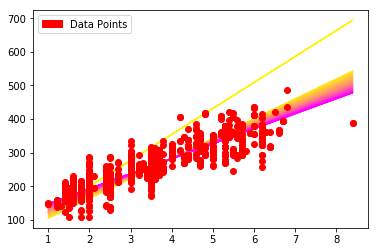

In [36]:
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(train_x)
    line = plt.plot(train_x, f_y)
    plt.setp(line, color=(cr,cg,cb))


green_line = mpatches.Patch(color='red', label='Data Points')
plt.legend(handles=[green_line]) 
plt.plot(train_x, train_y, 'ro')